# Analisis exploratorio de los datos-EDA Mauro Ferrera

In [4]:
#### IMPORTAMOS LAS LIBRERIAS A USAR Y LOS DATOS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling 

In [5]:
#### IMPORTAMOS DATOS 
data = pd.read_csv('df_arreglado1.csv')
print(data.shape)
data.head(3)

(45376, 25)


,Unnamed: 0,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,...,id_collection,name_collection,id_genres,name_genres,id_production,name_production,id_countrie,name_countrie,id_language,name_language
0,0,30000000.0,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,...,10194.0,Toy Story Collection,"16.0,35.0,10751.0","Animation,Comedy,Family",3.0,Pixar Animation Studios,US,United States of America,en,English
1,1,65000000.0,8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,Released,...,NaN,NaN,"12.0,14.0,10751.0","Adventure,Fantasy,Family","559.0,2550.0,10201.0","TriStar Pictures,Teitler Film,Interscope Commu...",US,United States of America,"en,fr","English,Français"
2,2,0.0,15602,en,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,0.0,101.0,Released,...,119050.0,Grumpy Old Men Collection,"10749.0,35.0","Romance,Comedy","6194.0,19464.0","Warner Bros.,Lancaster Gate",US,United States of America,en,English


# EDA

In [6]:
data.describe() #Describimiento estadistico de los datos

,Unnamed: 0,budget,id,popularity,revenue,runtime,vote_average,release_year,return,id_collection
count,45376.000000,4.537600e+04,45376.000000,45376.000000,4.537600e+04,45130.000000,45376.000000,45376.000000,4.537600e+04,4488.000000
mean,22687.500000,4.232604e+06,108027.103094,2.926458,1.123010e+07,94.181675,5.624070,1991.881193,6.600428e+02,184073.408868
std,13099.067244,1.743986e+07,112168.377996,6.009672,6.438996e+07,38.341059,1.915423,24.055360,7.469329e+04,141630.530505
min,0.000000,0.000000e+00,2.000000,0.000000,0.000000e+00,0.000000,0.000000,1874.000000,0.000000e+00,10.000000
25%,11343.750000,0.000000e+00,26385.750000,0.388840,0.000000e+00,85.000000,5.000000,1978.000000,0.000000e+00,86026.250000
50%,22687.500000,0.000000e+00,59857.500000,1.130454,0.000000e+00,95.000000,6.000000,2001.000000,0.000000e+00,141531.500000
75%,34031.250000,0.000000e+00,156533.500000,3.691695,0.000000e+00,107.000000,6.800000,2010.000000,0.000000e+00,294172.000000
max,45375.000000,3.800000e+08,469172.000000,547.488298,2.787965e+09,1256.000000,10.000000,2020.000000,1.239638e+07,480160.000000


In [7]:
data.info() # informacion de los datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45376 entries, 0 to 45375
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         45376 non-null  int64  
 1   budget             45376 non-null  float64
 2   id                 45376 non-null  int64  
 3   original_language  45365 non-null  object 
 4   overview           44435 non-null  object 
 5   popularity         45376 non-null  float64
 6   release_date       45376 non-null  object 
 7   revenue            45376 non-null  float64
 8   runtime            45130 non-null  float64
 9   status             45296 non-null  object 
 10  tagline            20398 non-null  object 
 11  title              45376 non-null  object 
 12  vote_average       45376 non-null  float64
 13  release_year       45376 non-null  int64  
 14  return             45376 non-null  float64
 15  id_collection      4488 non-null   float64
 16  name_collection    448

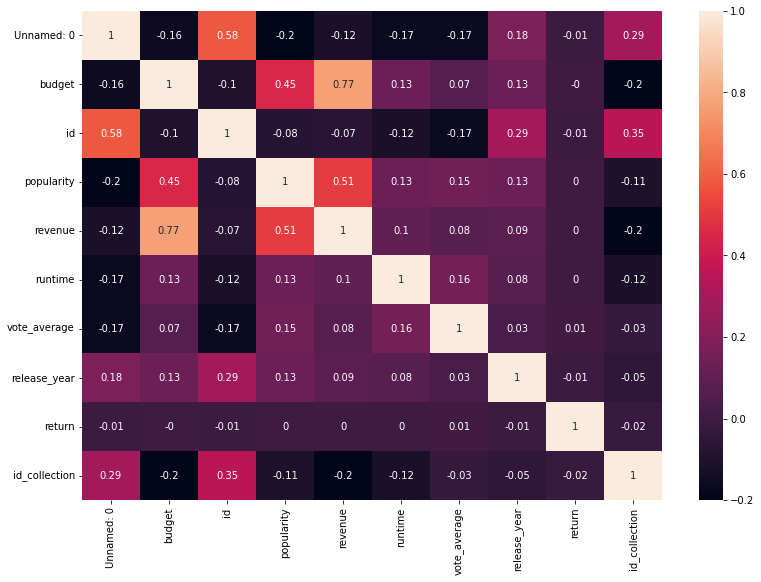

In [8]:
#### VEMOS LA CORRELACION DE LOS DATOS CON UN MAPA DE CALOR 
df_corr = data.corr().round(2)
plt.figure(figsize=(13,9))
sns.heatmap(data=df_corr, annot= True)
plt.show()

In [9]:
#### HACEMOS UN REPORTE DE LOS DATOS CON pandas_profiling
report = data.profile_report(title='Pandas profiling report ')
report.to_file(output_file="report_datos_peliculas.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 24.37it/s]


In [10]:
#### TRATAMOS DE ENCONTRAR OUTLIERS EN LOS DATOS
Q1= data.quantile(0.25)
Q3= data.quantile(0.75)
IQR = Q3 -Q1

limite_inf = Q1  - 1.5 * IQR
limite_sup = Q3 + 1.5 * IQR
mascaras = (data < limite_inf) | (data > limite_sup)
valores_atipicos = data[mascaras]
valores_atipicos

C:\Users\Usuario\AppData\Local\Temp\ipykernel_11180\175023785.py:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  mascaras = (data < limite_inf) | (data > limite_sup)


,Unnamed: 0,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,...,id_collection,name_collection,id_genres,name_genres,id_production,name_production,id_countrie,name_countrie,id_language,name_language
0,NaN,30000000.0,NaN,NaN,NaN,21.946943,NaN,373554033.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,65000000.0,NaN,NaN,NaN,17.015539,NaN,262797249.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,11.712900,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,16000000.0,NaN,NaN,NaN,NaN,NaN,81452156.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76578911.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


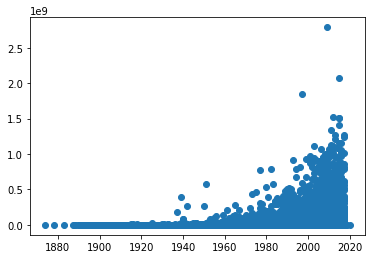

In [11]:
#### GRAFICO DE DISTRIBUCION DE LAS COLUMNAS 'revenue':ganancias y 'release_year': años

x=data['release_year']
y=data['revenue']
plt.scatter(x,y)
plt.show()

In [12]:
data.isnull().sum() # Contamos nulos 

Unnamed: 0               0
budget                   0
id                       0
original_language       11
overview               941
popularity               0
release_date             0
revenue                  0
runtime                246
status                  80
tagline              24978
title                    0
vote_average             0
release_year             0
return                   0
id_collection        40888
name_collection      40888
id_genres             2384
name_genres           2384
id_production        11796
name_production      11796
id_countrie           6211
name_countrie         6211
id_language           3768
name_language         3891
dtype: int64